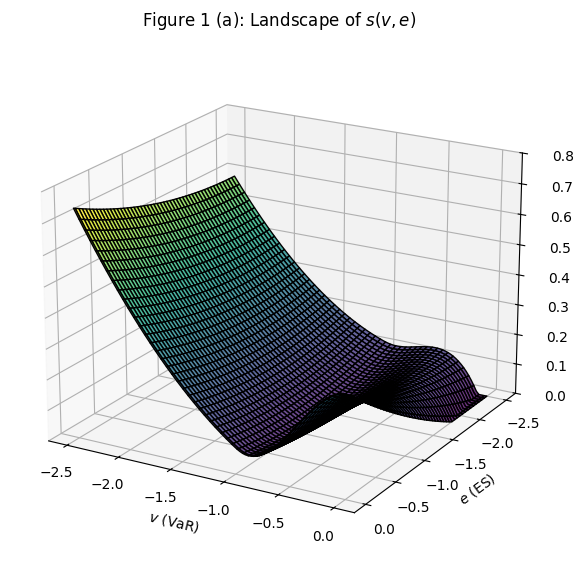

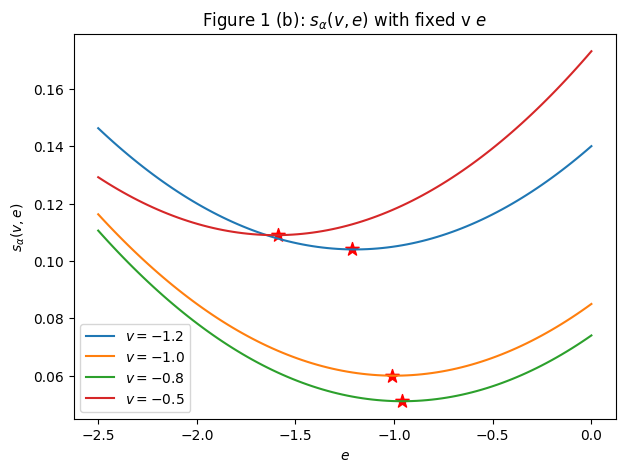

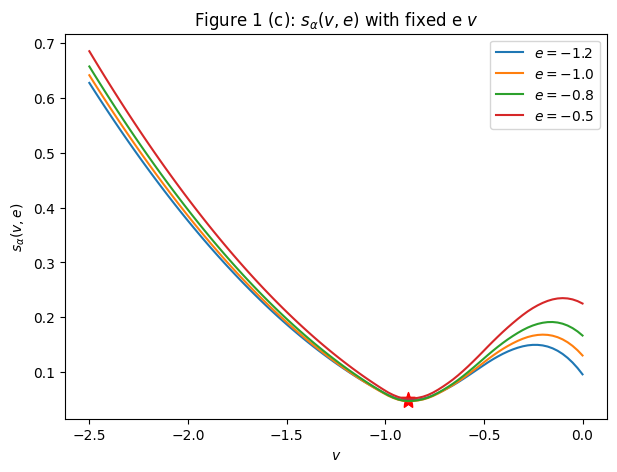

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
alpha = 0.05  # Confidence level
x_samples = np.random.uniform(-1, 1, size=1000)  # Uniform distribution

# Helper function to calculate VaR and ES
def calculate_var_es(alpha, x_samples):
    sorted_samples = np.sort(x_samples)
    var_alpha = sorted_samples[int(alpha * len(sorted_samples))]  # VaR
    es_alpha = np.mean(sorted_samples[:int(alpha * len(sorted_samples))])  # ES
    return var_alpha, es_alpha

# Calculate VaR and ES
VaR_alpha, ES_alpha = calculate_var_es(alpha, x_samples)

# Generate W_alpha satisfying the condition
W_alpha = 5

# Score function S_alpha(v, e, x)
def score_function(v, e, x):
    indicator = (x <= v).astype(float)
    term1 = (W_alpha / 2) * (indicator - alpha) * (x**2 - v**2)
    term2 = indicator * e * (v - x)
    term3 = alpha * e * ((e / 2) - v)
    return term1 + term2 + term3

# s(v, e) calculation (integrating over x_samples)
def s_function(v, e):
    scores = np.array([score_function(v, e, x) for x in x_samples])
    return np.mean(scores)  # Numerical integration via averaging

# Ranges for v and e
v_values = np.linspace(-2.5, 0, 100)
e_values = np.linspace(-2.5, 0, 100)

# Create meshgrid for v and e
V, E = np.meshgrid(v_values, e_values)

# Calculate s(v, e) for each pair of (v, e)
S = np.array([[s_function(v, e) for v in v_values] for e in e_values])
S = np.clip(S, 0, None)

# Figure 1 (a): 3D Landscape of s(v, e)
fig1 = plt.figure(figsize=(7, 7))
ax1 = fig1.add_subplot(111, projection='3d')

surf = ax1.plot_surface(V, E, S, cmap='viridis', edgecolor='k', alpha=0.8)

ax1.set_title("Figure 1 (a): Landscape of $s(v, e)$")
ax1.set_xlabel("$v$ (VaR)")
ax1.set_ylabel("$e$ (ES)")
ax1.set_zlabel("$s(v, e)$", labelpad=15)  # z축 라벨 간격 증가
ax1.set_zlim([0, 0.8])

ax1.view_init(elev=20, azim=120)
ax1.invert_xaxis()
ax1.zaxis.set_tick_params(pad=10)  # z축 틱 라벨 간격 증가

plt.show()

# Figure 1 (b): s_alpha(v, e) as a function of e with given v
fig2 = plt.figure(figsize=(7, 5))
ax2 = fig2.add_subplot(111)
v_fixed = [-1.2, -1.0, -0.8, -0.5]
for v in v_fixed:
    s_e = [s_function(v, e) for e in e_values]
    ax2.plot(e_values, s_e, label=f"$v={v}$")
    min_index = np.argmin(s_e)
    min_e = e_values[min_index]
    min_s = s_e[min_index]
    ax2.scatter(min_e, min_s, color='red', marker='*', s=100)

ax2.set_title("Figure 1 (b): $s_\\alpha(v, e)$ with fixed v $e$")
ax2.set_xlabel("$e$")
ax2.set_ylabel("$s_\\alpha(v, e)$")
ax2.legend()
plt.show()

# Figure 1 (c): s_alpha(v, e) as a function of v with given e
fig3 = plt.figure(figsize=(7, 5))
ax3 = fig3.add_subplot(111)
e_fixed = [-1.2, -1.0, -0.8, -0.5]
for e in e_fixed:
    s_v = [s_function(v, e) for v in v_values]
    ax3.plot(v_values, s_v, label=f"$e={e}$")
    min_index = np.argmin(s_v)
    min_v = v_values[min_index]
    min_s = s_v[min_index]
    ax3.scatter(min_v, min_s, color='red', marker='*', s=100)

ax3.set_title("Figure 1 (c): $s_\\alpha(v, e)$ with fixed e $v$")
ax3.set_xlabel("$v$")
ax3.set_ylabel("$s_\\alpha(v, e)$")
ax3.legend()
plt.show()
